In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtubecategories/youtube_categories - Sheet1.csv
/kaggle/input/youtube-new/GBvideos.csv
/kaggle/input/youtube-new/MXvideos.csv
/kaggle/input/youtube-new/KRvideos.csv
/kaggle/input/youtube-new/MX_category_id.json
/kaggle/input/youtube-new/GB_category_id.json
/kaggle/input/youtube-new/US_category_id.json
/kaggle/input/youtube-new/IN_category_id.json
/kaggle/input/youtube-new/DEvideos.csv
/kaggle/input/youtube-new/KR_category_id.json
/kaggle/input/youtube-new/RU_category_id.json
/kaggle/input/youtube-new/FRvideos.csv
/kaggle/input/youtube-new/USvideos.csv
/kaggle/input/youtube-new/INvideos.csv
/kaggle/input/youtube-new/RUvideos.csv
/kaggle/input/youtube-new/CA_category_id.json
/kaggle/input/youtube-new/DE_category_id.json
/kaggle/input/youtube-new/JP_category_id.json
/kaggle/input/youtube-new/JPvideos.csv
/kaggle/input/youtube-new/FR_category_id.json
/kaggle/input/youtube-new/CAvideos.csv


### canadian dataset

In [2]:
# loading canada dataset
df_ca = pd.read_csv("../input/youtube-new/CAvideos.csv")
df_ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

from the general overview, a few things that stand out are:
* not all channels have a description
* trending date and publish time are listed as an object, they could be candidates for conversion to datetime format

In [3]:
# canada dataset overview
df_ca.describe()

,category_id,views,likes,dislikes,comment_count
count,40881.000000,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04
mean,20.795553,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03
std,6.775054,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02
50%,24.000000,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03
75%,24.000000,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06


In [4]:
# first five columns of canada dataset
df_ca.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [5]:
# checking the number of unique values in each row
df_ca.nunique()

video_id                  24427
trending_date               205
title                     24573
channel_title              5076
category_id                  17
publish_time              23613
tags                      20157
views                     40170
likes                     24676
dislikes                   6241
comment_count             11172
thumbnail_link            24422
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description               22345
dtype: int64

* there are 205 unique dates
* the number of unique values in the category section is 17. This is a candidate for conversion to a categorical variable.
* comments_disabled, ratings_disabled and video_error_or_removed are also candidates for conversion to categorical variables

In [6]:
# checking the total number of duplicated values in canada dataset
df_ca.duplicated().sum()

0

In [7]:
df_ca['region'] = "canada"
df_ca.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,canada
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,canada
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,canada
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,canada
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,canada


### Great Britain

In [8]:
# loading Great Britain dataset
df_gb = pd.read_csv("../input/youtube-new/GBvideos.csv")
df_gb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                38916 non-null  object
 1   trending_date           38916 non-null  object
 2   title                   38916 non-null  object
 3   channel_title           38916 non-null  object
 4   category_id             38916 non-null  int64 
 5   publish_time            38916 non-null  object
 6   tags                    38916 non-null  object
 7   views                   38916 non-null  int64 
 8   likes                   38916 non-null  int64 
 9   dislikes                38916 non-null  int64 
 10  comment_count           38916 non-null  int64 
 11  thumbnail_link          38916 non-null  object
 12  comments_disabled       38916 non-null  bool  
 13  ratings_disabled        38916 non-null  bool  
 14  video_error_or_removed  38916 non-null  bool  
 15  de

In [9]:
df_gb['region'] = "gb"
df_gb.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,gb
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,gb
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,gb
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,gb
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,gb


In [10]:
# comparing the columns in the Great Britain dataset with the columns in the Canada dataset
df_ca.columns == df_gb.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

here I verify that the columns in great britain are the same as the columns in canada

In [11]:
# showing summary statistics for the Great Britain dataset
df_gb.describe()

,category_id,views,likes,dislikes,comment_count
count,38916.000000,3.891600e+04,3.891600e+04,3.891600e+04,3.891600e+04
mean,16.827937,5.911944e+06,1.345196e+05,7.612560e+03,1.308835e+04
std,7.752728,1.900121e+07,3.499893e+05,5.095683e+04,5.066740e+04
min,1.000000,8.510000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,10.000000,2.515272e+05,5.897000e+03,2.000000e+02,6.790000e+02
50%,20.000000,9.818890e+05,2.518250e+04,8.210000e+02,2.478000e+03
75%,24.000000,3.683628e+06,1.140892e+05,3.357500e+03,9.241500e+03
max,43.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


In [12]:
# Getting general overview of Great Britain column and row structure
df_gb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                38916 non-null  object
 1   trending_date           38916 non-null  object
 2   title                   38916 non-null  object
 3   channel_title           38916 non-null  object
 4   category_id             38916 non-null  int64 
 5   publish_time            38916 non-null  object
 6   tags                    38916 non-null  object
 7   views                   38916 non-null  int64 
 8   likes                   38916 non-null  int64 
 9   dislikes                38916 non-null  int64 
 10  comment_count           38916 non-null  int64 
 11  thumbnail_link          38916 non-null  object
 12  comments_disabled       38916 non-null  bool  
 13  ratings_disabled        38916 non-null  bool  
 14  video_error_or_removed  38916 non-null  bool  
 15  de

In [13]:
# Getting first five rows from Great Britain dataset
df_gb.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,gb
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,gb
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,gb
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,gb
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,gb


In [14]:
# Getting the number of unique values for each column
df_gb.nunique()

video_id                   3272
trending_date               205
title                      3369
channel_title              1625
category_id                  16
publish_time               3250
tags                       3122
views                     38393
likes                     30556
dislikes                  11092
comment_count             15778
thumbnail_link             3272
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                3704
region                        1
dtype: int64

In [15]:
# getting the sum of duplicated values in the Great Britain dataset
df_gb.duplicated().sum()

171

Here we see there are 171 duplicated rows in the Great Britain dataset

In [16]:
# saving duplicated values in a dataframe
df_gb_duplicated = df_gb[df_gb.duplicated() == True]
df_gb_duplicated.head()
# df_gb[df_gb['ID'].duplicated() == True]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region
33743,RUCXD3_wW2w,18.14.05,New Hulu Show - SNL,Saturday Night Live,24,2018-05-13T04:59:28.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""SNL...",723495,6362,1589,420,https://i.ytimg.com/vi/RUCXD3_wW2w/default.jpg,False,False,False,From the executive producer of Sex and the Cit...,gb
33744,p8npDG2ulKQ,18.14.05,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,10,2018-05-06T15:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",26912663,2636004,27675,366899,https://i.ytimg.com/vi/p8npDG2ulKQ/default.jpg,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,gb
33745,aixso4N2vhI,18.14.05,President Trump Gives Remarks on the Joint Com...,The White House,25,2018-05-08T18:45:37.000Z,[none],89715,2806,488,1657,https://i.ytimg.com/vi/aixso4N2vhI/default.jpg,False,False,False,The White House,gb
33746,bu0m_UdtoaU,18.14.05,Serious Questions: Avengers Infinity War,Screen Junkies,1,2018-05-06T17:00:03.000Z,"screenjunkies|""screen junkies""|""serious questi...",443621,12892,3829,2275,https://i.ytimg.com/vi/bu0m_UdtoaU/default.jpg,False,False,False,After watching Avengers: Infinity War we have ...,gb
33747,i-G1hy73Mb8,18.14.05,Eurovision Song Contest 2018 - Opening Ceremon...,Eurovision Song Contest,24,2018-05-06T19:46:34.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Openi...",698827,11721,461,1175,https://i.ytimg.com/vi/i-G1hy73Mb8/default.jpg,False,False,False,"At 18:00 CEST today, the Blue Carpet ceremony ...",gb


In [17]:
# confirming duplication using one row
df_gb.loc[df_gb['views'] == 723495]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region
33629,RUCXD3_wW2w,18.14.05,New Hulu Show - SNL,Saturday Night Live,24,2018-05-13T04:59:28.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""SNL...",723495,6362,1589,420,https://i.ytimg.com/vi/RUCXD3_wW2w/default.jpg,False,False,False,From the executive producer of Sex and the Cit...,gb
33743,RUCXD3_wW2w,18.14.05,New Hulu Show - SNL,Saturday Night Live,24,2018-05-13T04:59:28.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""SNL...",723495,6362,1589,420,https://i.ytimg.com/vi/RUCXD3_wW2w/default.jpg,False,False,False,From the executive producer of Sex and the Cit...,gb


In [18]:
# removing the duplicated values and confirming
df_gb.drop_duplicates(inplace=True)
df_gb.duplicated().sum()

0

### United States

In [19]:
# reading the us videos dataset into a new dataframe
df_us = pd.read_csv("../input/youtube-new/USvideos.csv")
df_us.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [20]:
df_us['region'] = "us"
df_us.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,us
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",us
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,us
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,us
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,us


In [21]:
# comparing the columns in the us dataframe with columns in the canada dataframe
df_ca.columns == df_us.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

Here we see that the columns in df_ca and df_us are the same

In [22]:
# getting general column information for the US dataset
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [23]:
# getting summary statistics for the us dataset
df_us.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [24]:
# getting the number of unique values for each row in the US datset
df_us.nunique()

video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
region                        1
dtype: int64

In [25]:
# getting the sum of duplicated values
df_us.duplicated().sum()

48

We have 48 duplicated columns in the us dataset.

In [26]:
# viewing the duplicated values
df_us[df_us.duplicated() == True].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region
34899,QBL8IRJ5yHU,18.15.05,Why I'm So Scared (being myself and crying too...,grav3yardgirl,26,2018-05-14T19:00:01.000Z,"beauty|""how to""|""makeup""|""howto""|""style""|""fash...",1469627,188652,3124,33032,https://i.ytimg.com/vi/QBL8IRJ5yHU/default.jpg,False,False,False,I will never be able to say Thank You enough.....,us
34900,t4pRQ0jn23Q,18.15.05,YoungBoy Never Broke Again Goes Sneaker Shoppi...,Complex,24,2018-05-14T14:00:03.000Z,"sneakerhead|""complex""|""complex originals""|""sne...",1199587,49709,2380,7261,https://i.ytimg.com/vi/t4pRQ0jn23Q/default.jpg,False,False,False,YoungBoy Never Broke Again goes Sneaker Shoppi...,us
34901,j4KvrAUjn6c,18.15.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",3906727,77378,12160,15874,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...,us
34902,MAjY8mCTXWk,18.15.05,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's...",杰威爾音樂 JVR Music,10,2018-05-14T15:59:47.000Z,"周杰倫|""Jay""|""Chou""|""周董""|""周杰伦""|""周傑倫""|""杰威尔""|""周周""|""...",916128,40485,1042,4746,https://i.ytimg.com/vi/MAjY8mCTXWk/default.jpg,False,False,False,詞：周杰倫、宋健彰（彈頭） 曲：周杰倫憂鬱型男的走心旋律 用英式搖滾宣洩情傷不愛我就拉倒...,us
34903,xhs8tf1v__w,18.15.05,Terry Crews Answers the Web's Most Searched Qu...,WIRED,24,2018-05-14T16:00:29.000Z,"autocomplete|""deadpool 2""|""google autocomplete...",343967,16988,132,1308,https://i.ytimg.com/vi/xhs8tf1v__w/default.jpg,False,False,False,Terry Crews takes the WIRED Autocomplete Inter...,us


In [27]:
# removing duplicates and confirming
df_us.drop_duplicates(inplace=True)
df_us.duplicated().sum()

0

### Merging the data

In [28]:
# merging the canada dataframe with the Great Britain and US dataframes
df = df_ca.append([df_gb, df_us])

In [29]:
# Getting the general information of the new dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120527 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                120527 non-null  object
 1   trending_date           120527 non-null  object
 2   title                   120527 non-null  object
 3   channel_title           120527 non-null  object
 4   category_id             120527 non-null  int64 
 5   publish_time            120527 non-null  object
 6   tags                    120527 non-null  object
 7   views                   120527 non-null  int64 
 8   likes                   120527 non-null  int64 
 9   dislikes                120527 non-null  int64 
 10  comment_count           120527 non-null  int64 
 11  thumbnail_link          120527 non-null  object
 12  comments_disabled       120527 non-null  bool  
 13  ratings_disabled        120527 non-null  bool  
 14  video_error_or_removed  120527 non-nu

In [30]:
# Getting the sum of duplicated values
df.duplicated().sum()

0

In [31]:
# saving the duplicates in a different dataframe
duplicates = df.loc[df.duplicated(keep='first'), :]
duplicates.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region


In [32]:
# getting an example from the duplicates table, I just wanted to confirm that some values are duplicated
# more than once
duplicates.query('views == 1611093')

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region


In [33]:
# deleting the duplicates dataframe
del duplicates


In [34]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [35]:
# data remaining after dropping duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120527 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                120527 non-null  object
 1   trending_date           120527 non-null  object
 2   title                   120527 non-null  object
 3   channel_title           120527 non-null  object
 4   category_id             120527 non-null  int64 
 5   publish_time            120527 non-null  object
 6   tags                    120527 non-null  object
 7   views                   120527 non-null  int64 
 8   likes                   120527 non-null  int64 
 9   dislikes                120527 non-null  int64 
 10  comment_count           120527 non-null  int64 
 11  thumbnail_link          120527 non-null  object
 12  comments_disabled       120527 non-null  bool  
 13  ratings_disabled        120527 non-null  bool  
 14  video_error_or_removed  120527 non-nu

### Exploratory data analysis for the three countries

In [36]:
import matplotlib.pyplot as plt
import seaborn as sb

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 12663 to 40743
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                1227 non-null   object
 1   trending_date           1227 non-null   object
 2   title                   1227 non-null   object
 3   channel_title           1227 non-null   object
 4   category_id             1227 non-null   int64 
 5   publish_time            1227 non-null   object
 6   tags                    1227 non-null   object
 7   views                   1227 non-null   int64 
 8   likes                   1227 non-null   int64 
 9   dislikes                1227 non-null   int64 
 10  comment_count           1227 non-null   int64 
 11  thumbnail_link          1227 non-null   object
 12  comments_disabled       1227 non-null   bool  
 13  ratings_disabled        1227 non-null   bool  
 14  video_error_or_removed  1227 non-null   bool  
 15 

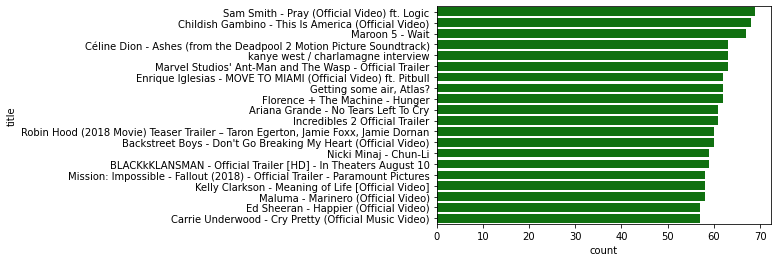

In [37]:
# plotting titles which occur the most number of times in the dataset
most_frequent = df.title.value_counts().index[:20]

most_frequent_df = df.loc[df['title'].isin(most_frequent)]
most_frequent_df.info()

sb.countplot(data=most_frequent_df, y='title', color='green', order=most_frequent);

In [38]:
# checking trnding channels and videos with hidden comments
df[['channel_title', 'title']].loc[df.comments_disabled==True]
# df.loc[df.comments_disabled==True]

,channel_title,title
70,The National,"The National for Sunday, November 12, 2017"
82,The X Factor UK,Will Grace Davies make you love her? | Live Sh...
173,On n'est pas couché,Intégrale - On n'est pas couché 11 novembre 20...
235,TV Classics,Marie-Louise Arsenault réplique à Denise Bomba...
371,PBS NewsHour,WATCH LIVE: Attorney General Sessions testifie...
...,...,...
40549,Nintendo,Nintendo @ E3 2018: Day 1
40624,Apple,iPhone X — Animoji: Taxi Driver — Apple
40631,Britain's Got Talent,And the WINNER of Britain’s Got Talent 2018 is...
40832,Apple,iPhone X — Animoji: Taxi Driver — Apple


In [39]:
# checking trending channels and videos that have more dislikes than likes
df.loc[df.likes<df.dislikes]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region
42,t3FYESkzjUI,17.14.11,Emotionally Responsive Digital Human,Soul Machines,22,2017-10-31T01:11:48.000Z,"artificial intelligence|""digital human""|""virtu...",3684,4,5,1,https://i.ytimg.com/vi/t3FYESkzjUI/default.jpg,False,False,False,Soul Machines is making machines more human,canada
69,F5mzb086QM8,17.14.11,Secrets of Dairy: Larson Dairy Farm,The Secrets of Dairy,22,2017-11-09T22:15:58.000Z,"secrets of dairy|""larson dairy farms""|""publix""...",29234,37,65,62,https://i.ytimg.com/vi/F5mzb086QM8/default.jpg,False,False,False,"In August of 2017, undercover investigations w...",canada
98,lHcXhBojpeQ,17.14.11,三屆TVB視帝，拋棄10年青梅竹馬髮妻，為娶小三還不惜與母絕交！,明星百曉生,22,2017-11-12T12:49:50.000Z,[none],88061,47,58,17,https://i.ytimg.com/vi/lHcXhBojpeQ/default.jpg,False,False,False,NaN,canada
169,vqfU6N0IU5Y,17.14.11,How To Make Money Online With Mobile/Tablet ( ...,lHeadHunterl,22,2017-11-10T19:12:55.000Z,"how to make money|""make money online""|""how to ...",12603,90,1022,8,https://i.ytimg.com/vi/vqfU6N0IU5Y/default.jpg,False,False,False,"https://apptester.info\nHello guys, Today I'll...",canada
182,SwnP04VvfOY,17.14.11,بالفيديو ... سعد الحريري يتلقى معلومة من خلف ا...,tayyar.org,25,2017-11-12T20:09:03.000Z,[none],40454,2,5,2,https://i.ytimg.com/vi/SwnP04VvfOY/default.jpg,False,False,False,NaN,canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39968,GnGPAYvve1A,18.10.06,#ProudToCreate: Pride 2018,YouTube Spotlight,24,2018-06-07T19:08:51.000Z,"#Pride|""#ProudToCreate""|""#ProudToBe""|""#ProudTo...",1227495,46556,121865,87199,https://i.ytimg.com/vi/GnGPAYvve1A/default.jpg,False,False,False,You don't just imagine a better future – you c...,us
40171,GnGPAYvve1A,18.11.06,#ProudToCreate: Pride 2018,YouTube Spotlight,24,2018-06-07T19:08:51.000Z,"#Pride|""#ProudToCreate""|""#ProudToBe""|""#ProudTo...",1253843,47073,123424,88066,https://i.ytimg.com/vi/GnGPAYvve1A/default.jpg,False,False,False,You don't just imagine a better future – you c...,us
40388,GnGPAYvve1A,18.12.06,#ProudToCreate: Pride 2018,YouTube Spotlight,24,2018-06-07T19:08:51.000Z,"#Pride|""#ProudToCreate""|""#ProudToBe""|""#ProudTo...",1291035,47762,125583,89296,https://i.ytimg.com/vi/GnGPAYvve1A/default.jpg,False,False,False,You don't just imagine a better future – you c...,us
40597,GnGPAYvve1A,18.13.06,#ProudToCreate: Pride 2018,YouTube Spotlight,24,2018-06-07T19:08:51.000Z,"#Pride|""#ProudToCreate""|""#ProudToBe""|""#ProudTo...",1315418,48135,126480,89956,https://i.ytimg.com/vi/GnGPAYvve1A/default.jpg,False,False,False,You don't just imagine a better future – you c...,us


The date is in the format yy/dd/mm but in string format

In [40]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format="%y.%d.%m", dayfirst=True)

df['trending_date'].tail()

40944   2018-06-14
40945   2018-06-14
40946   2018-06-14
40947   2018-06-14
40948   2018-06-14
Name: trending_date, dtype: datetime64[ns]

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120527 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   video_id                120527 non-null  object        
 1   trending_date           120527 non-null  datetime64[ns]
 2   title                   120527 non-null  object        
 3   channel_title           120527 non-null  object        
 4   category_id             120527 non-null  int64         
 5   publish_time            120527 non-null  object        
 6   tags                    120527 non-null  object        
 7   views                   120527 non-null  int64         
 8   likes                   120527 non-null  int64         
 9   dislikes                120527 non-null  int64         
 10  comment_count           120527 non-null  int64         
 11  thumbnail_link          120527 non-null  object        
 12  comments_disabled       120527 

In [42]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_time'].tail(5)

40944   2018-05-18 13:00:04+00:00
40945   2018-05-18 01:00:06+00:00
40946   2018-05-18 17:34:22+00:00
40947   2018-05-17 17:00:04+00:00
40948   2018-05-17 17:09:38+00:00
Name: publish_time, dtype: datetime64[ns, UTC]

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120527 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   video_id                120527 non-null  object             
 1   trending_date           120527 non-null  datetime64[ns]     
 2   title                   120527 non-null  object             
 3   channel_title           120527 non-null  object             
 4   category_id             120527 non-null  int64              
 5   publish_time            120527 non-null  datetime64[ns, UTC]
 6   tags                    120527 non-null  object             
 7   views                   120527 non-null  int64              
 8   likes                   120527 non-null  int64              
 9   dislikes                120527 non-null  int64              
 10  comment_count           120527 non-null  int64              
 11  thumbnail_link          120

In [44]:
df.sort_values(by=['views'], ascending=False)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region
28412,_I_D_8Z4sJE,2018-04-07,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,10,2018-03-02 05:00:19+00:00,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",424538912,2818771,149275,99380,https://i.ytimg.com/vi/_I_D_8Z4sJE/default.jpg,False,False,False,Disponible en tu plataforma preferida:\nhttps:...,gb
28212,_I_D_8Z4sJE,2018-04-06,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,10,2018-03-02 05:00:19+00:00,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",413586699,2768654,145643,97218,https://i.ytimg.com/vi/_I_D_8Z4sJE/default.jpg,False,False,False,Disponible en tu plataforma preferida:\nhttps:...,gb
28008,_I_D_8Z4sJE,2018-04-05,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,10,2018-03-02 05:00:19+00:00,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",402650804,2719005,142006,95713,https://i.ytimg.com/vi/_I_D_8Z4sJE/default.jpg,False,False,False,Disponible en tu plataforma preferida:\nhttps:...,gb
27811,_I_D_8Z4sJE,2018-04-04,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,10,2018-03-02 05:00:19+00:00,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",392036878,2670723,138334,93834,https://i.ytimg.com/vi/_I_D_8Z4sJE/default.jpg,False,False,False,Disponible en tu plataforma preferida:\nhttps:...,gb
27615,_I_D_8Z4sJE,2018-04-03,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,10,2018-03-02 05:00:19+00:00,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",382401497,2618320,134625,92387,https://i.ytimg.com/vi/_I_D_8Z4sJE/default.jpg,False,False,False,Disponible en tu plataforma preferida:\nhttps:...,gb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,-JVITToppE0,2017-11-16,Coach Taggart Monday Presser Ahead of Arizona,GoDucksdotcom,17,2017-11-13 20:41:45+00:00,"Oregon|""Ducks""|""college athletics""|""college fo...",687,10,2,5,https://i.ytimg.com/vi/-JVITToppE0/default.jpg,False,False,False,Coach Taggart addresses the media ahead of the...,us
14531,dQMZLXaa1L8,2018-01-27,Artwork Forge,Palo Alto Online,17,2018-01-10 23:53:56+00:00,[none],658,1,0,0,https://i.ytimg.com/vi/dQMZLXaa1L8/default.jpg,False,False,False,Artwork Forge II - an art installation created...,us
14782,y6KYFcta4SE,2018-01-28,"1 dead, others injured after Ky. school shooting",Newsy,25,2018-01-23 15:30:01+00:00,"shooting|""kentucky""|""breaking news""|""u.s. news...",559,9,0,4,https://i.ytimg.com/vi/y6KYFcta4SE/default.jpg,False,False,False,Kentucky Gov. Matt Bevin confirmed there was a...,us
14563,y6KYFcta4SE,2018-01-27,"1 dead, others injured after Ky. school shooting",Newsy,25,2018-01-23 15:30:01+00:00,"shooting|""kentucky""|""breaking news""|""u.s. news...",554,9,0,4,https://i.ytimg.com/vi/y6KYFcta4SE/default.jpg,False,False,False,Kentucky Gov. Matt Bevin confirmed there was a...,us


In [45]:
df.nunique()

video_id                   30318
trending_date                205
title                      30626
channel_title               6924
category_id                   17
publish_time               29151
tags                       25754
views                     105513
likes                      57744
dislikes                   14306
comment_count              22159
thumbnail_link             30313
comments_disabled              2
ratings_disabled               2
video_error_or_removed         2
description                29038
region                         3
dtype: int64

In [46]:
cat_ids = df['category_id'].unique()
print(type(cat_ids))
np.sort(cat_ids)

<class 'numpy.ndarray'>


array([ 1,  2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 43])

In [47]:
# the categories csv contains a table of category id and category
categories = pd.read_csv("/kaggle/input/youtubecategories/youtube_categories - Sheet1.csv")
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        32 non-null     int64 
 1   category  32 non-null     object
dtypes: int64(1), object(1)
memory usage: 640.0+ bytes


In [48]:
df = pd.merge(df, categories, left_on='category_id', right_on='id', how="left")

In [49]:
df.drop(columns=['id'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120527 entries, 0 to 120526
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   video_id                120527 non-null  object             
 1   trending_date           120527 non-null  datetime64[ns]     
 2   title                   120527 non-null  object             
 3   channel_title           120527 non-null  object             
 4   category_id             120527 non-null  int64              
 5   publish_time            120527 non-null  datetime64[ns, UTC]
 6   tags                    120527 non-null  object             
 7   views                   120527 non-null  int64              
 8   likes                   120527 non-null  int64              
 9   dislikes                120527 non-null  int64              
 10  comment_count           120527 non-null  int64              
 11  thumbnail_link          12

In [50]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region,category
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,canada,Music
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,canada,Comedy
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,canada,Comedy
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,canada,Entertainment
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,canada,Music


In [51]:
df.groupby(['category']).sum()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category,,,,,,,,
Autos & Vehicles,1762,934941305,12521395,721976,2305720,15,10,1
Comedy,208058,12758805326,555083624,17204909,58819360,11,0,2
Education,83781,2156239728,87787753,2738243,10046072,19,7,0
Entertainment,778800,63847099724,1656883326,156267293,245123502,679,205,50
Film & Animation,6967,18520806324,389956410,15334613,43485682,149,148,35
Gaming,78760,5111858045,190492667,13909113,30530260,78,13,0
Howto & Style,210002,6832013708,265059340,8800015,38794970,19,18,1
Movies,180,17120490,252905,12280,13979,0,0,0
Music,238980,223727424650,5705142665,231726048,469007998,64,65,21


In [52]:
df.groupby(['category'])['views'].sum()

category
Autos & Vehicles            934941305
Comedy                    12758805326
Education                  2156239728
Entertainment             63847099724
Film & Animation          18520806324
Gaming                     5111858045
Howto & Style              6832013708
Movies                       17120490
Music                    223727424650
News & Politics            4475520544
Nonprofits & Activism       637341277
People & Blogs            13883048630
Pets & Animals             1538438963
Science & Technology       6528354326
Shows                       151633849
Sports                    10738821716
Travel & Events             619632554
Name: views, dtype: int64

In [53]:
df.groupby(['category', 'region'])['views'].sum()

category               region
Autos & Vehicles       canada       200066074
                       gb           214184514
                       us           520690717
Comedy                 canada      3708438785
                       gb          3939099951
                       us          5111266590
Education              canada       531773343
                       gb           444290557
                       us          1180175828
Entertainment          canada     13671215509
                       gb         29614782333
                       us         20561101882
Film & Animation       canada      2939060844
                       gb          8313953048
                       us          7267792432
Gaming                 canada      1241532385
                       gb          1742525879
                       us          2127799781
Howto & Style          canada      1570846611
                       gb          1190155227
                       us          4071011870
Movi

In [54]:
df.groupby(['category'])['likes', 'dislikes'].sum()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,likes,dislikes
category,,
Autos & Vehicles,12521395,721976
Comedy,555083624,17204909
Education,87787753,2738243
Entertainment,1656883326,156267293
Film & Animation,389956410,15334613
Gaming,190492667,13909113
Howto & Style,265059340,8800015
Movies,252905,12280
Music,5705142665,231726048


In [55]:
# avg_popularity = df.groupby(['category'])['likes', 'dislikes'].mean()
avg_popularity = df.groupby(['category'], as_index=False)[['likes', 'dislikes']].mean()
avg_popularity

,category,likes,dislikes
0,Autos & Vehicles,14212.707151,819.496027
1,Comedy,61362.328543,1901.935552
2,Education,28291.251370,882.450209
3,Entertainment,51059.578613,4815.633066
4,Film & Animation,55971.926224,2201.035309
5,Gaming,48372.947435,3532.024632
6,Howto & Style,32816.558128,1089.515290
7,Movies,42150.833333,2046.666667
8,Music,238728.875429,9696.461963
9,News & Politics,10327.670822,1425.104935


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Autos & Vehicles'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Education'),
  Text(3, 0, 'Entertainment'),
  Text(4, 0, 'Film & Animation'),
  Text(5, 0, 'Gaming'),
  Text(6, 0, 'Howto & Style'),
  Text(7, 0, 'Movies'),
  Text(8, 0, 'Music'),
  Text(9, 0, 'News & Politics'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'People & Blogs'),
  Text(12, 0, 'Pets & Animals'),
  Text(13, 0, 'Science & Technology'),
  Text(14, 0, 'Shows'),
  Text(15, 0, 'Sports'),
  Text(16, 0, 'Travel & Events')])

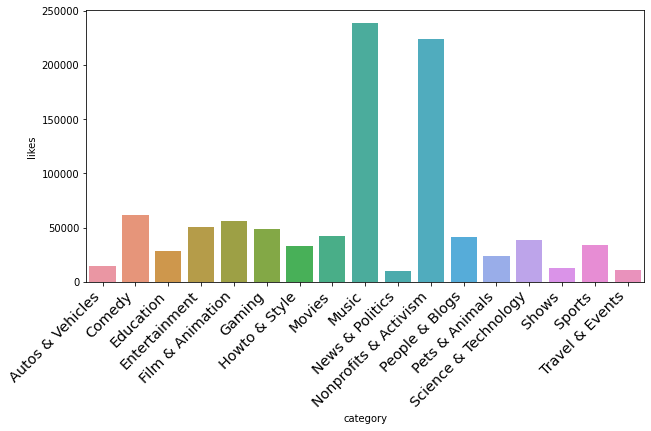

In [56]:
# sb.barplot(data = avg_popularity,x='category', y='likes')
# sb.barplot(data = df, x=df.groupby(['category']) , y=df.groupby(['category'])['likes, dislikes'].mean())
# import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
chart = sb.barplot(
    data=avg_popularity,
    x='category',
    y='likes'
)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

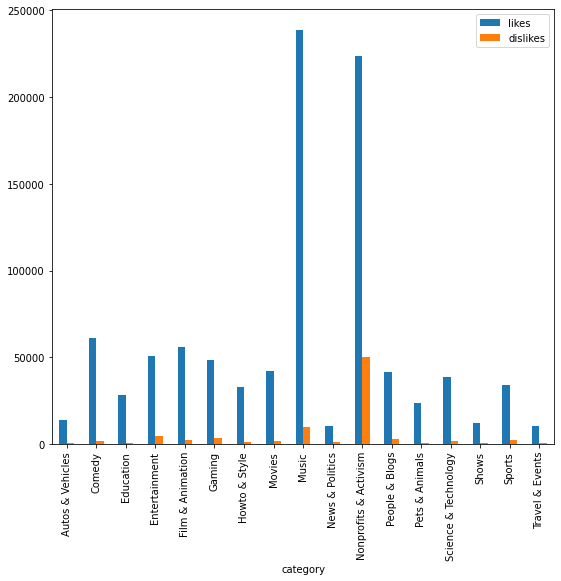

In [57]:
avg_popularity.plot(x="category", y=["likes", "dislikes"], kind="bar", figsize=(9, 8));

In [58]:
avg_popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  17 non-null     object 
 1   likes     17 non-null     float64
 2   dislikes  17 non-null     float64
dtypes: float64(2), object(1)
memory usage: 536.0+ bytes
